KNN Classification Metrics: {'train_confusion_matrix': array([[ 65,  17,  10],
       [ 13, 314,  67],
       [  4,  59, 351]]), 'test_confusion_matrix': array([[15, 11,  4],
       [ 6, 69, 28],
       [ 5, 21, 67]]), 'train_precision': 0.810740037419545, 'train_recall': 0.8111111111111111, 'train_f1': 0.8105572983190782, 'test_precision': 0.6664310746935824, 'test_recall': 0.668141592920354, 'test_f1': 0.6666112794675392}
Linear Regression Metrics: {'train_mse': 4.354512196819985e-26, 'test_mse': 5.533385933582265e-26, 'train_mape': 8.56201808192539e-16, 'test_mape': 1.2529022054387628e-15, 'train_r2': 1.0, 'test_r2': 1.0}


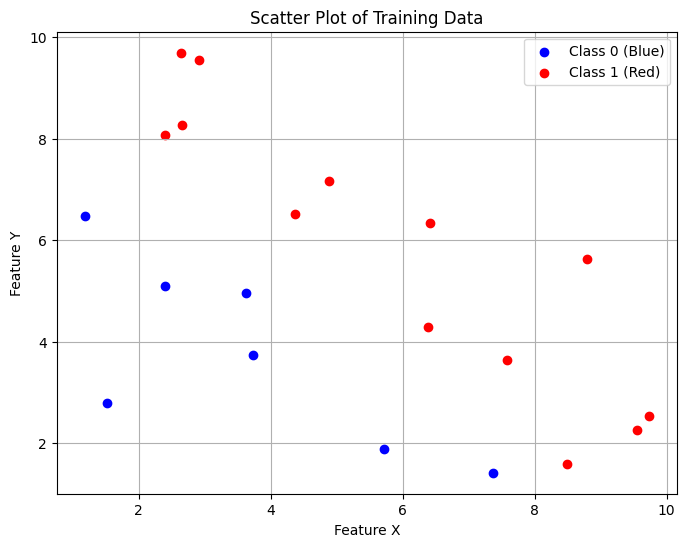

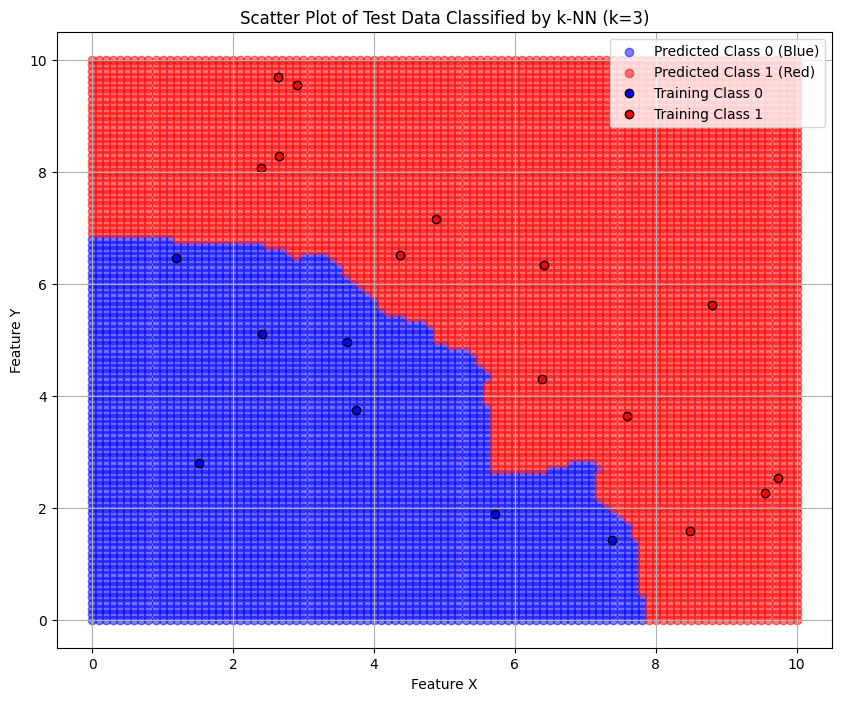

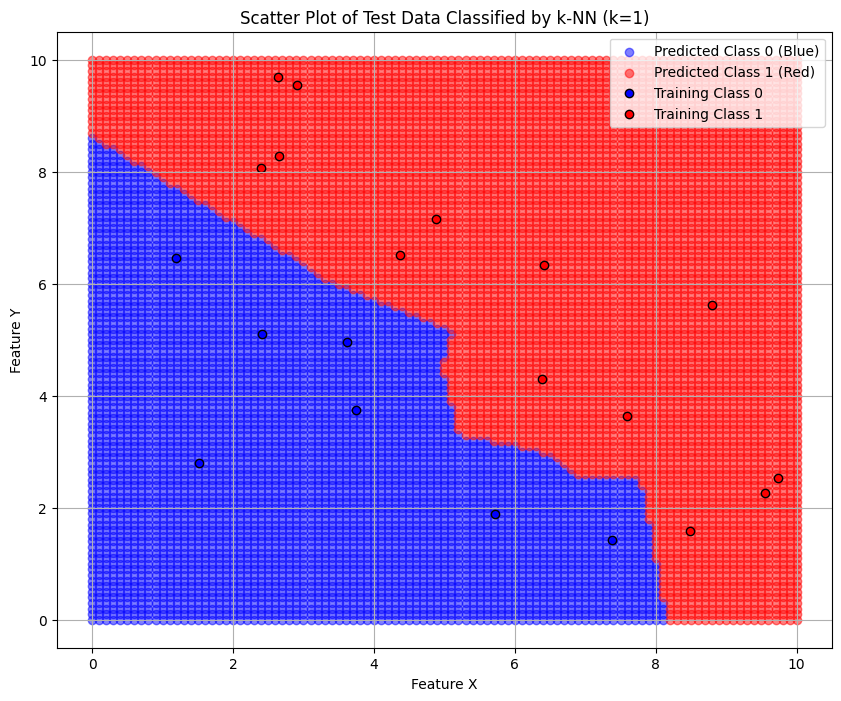

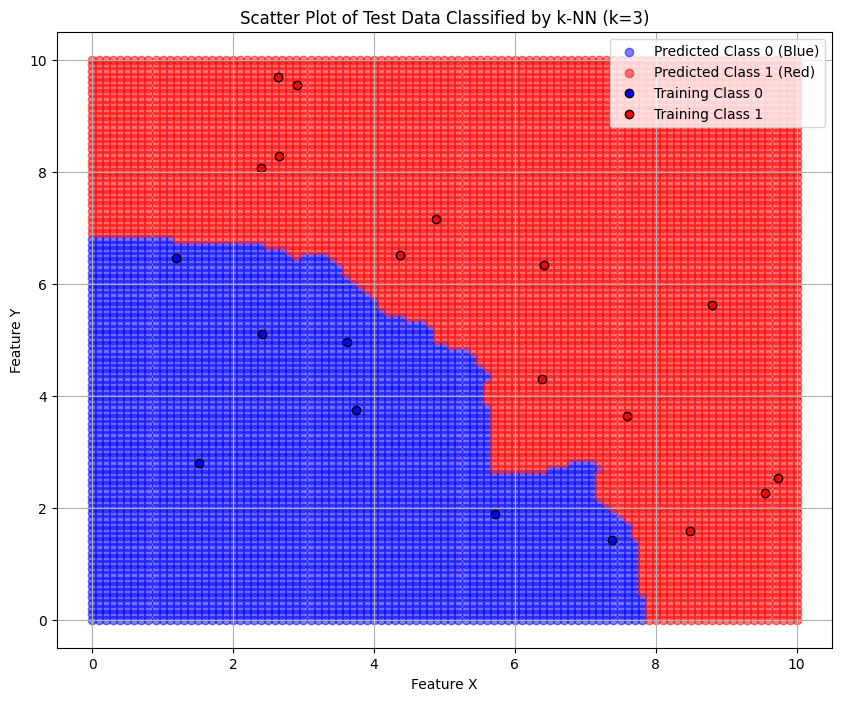

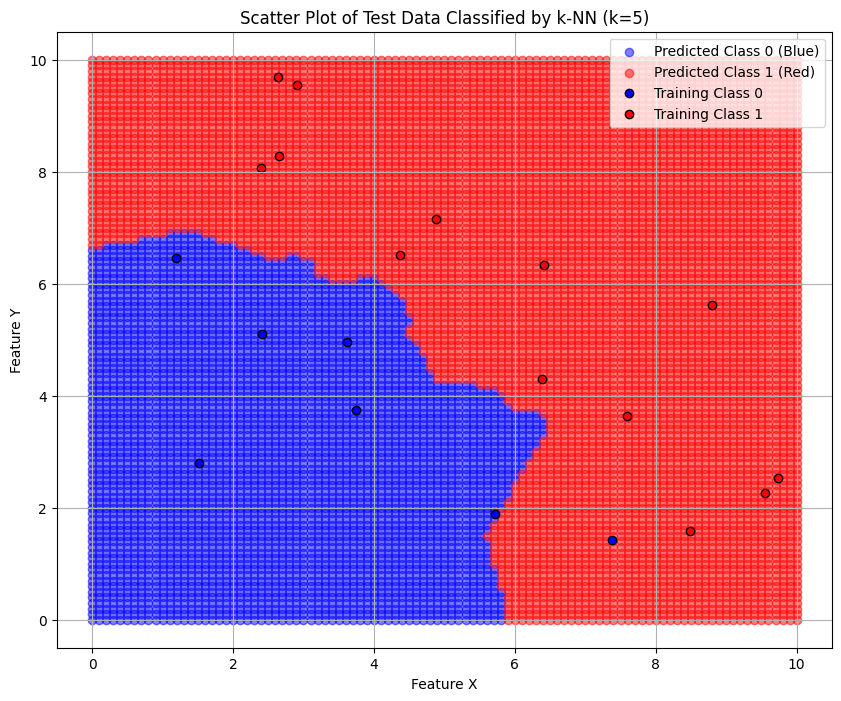

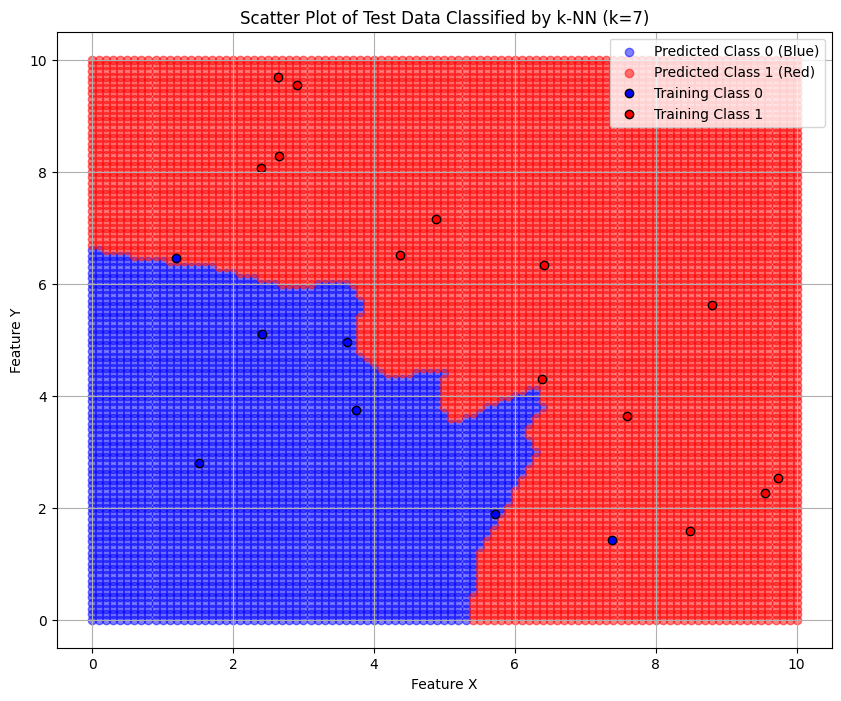

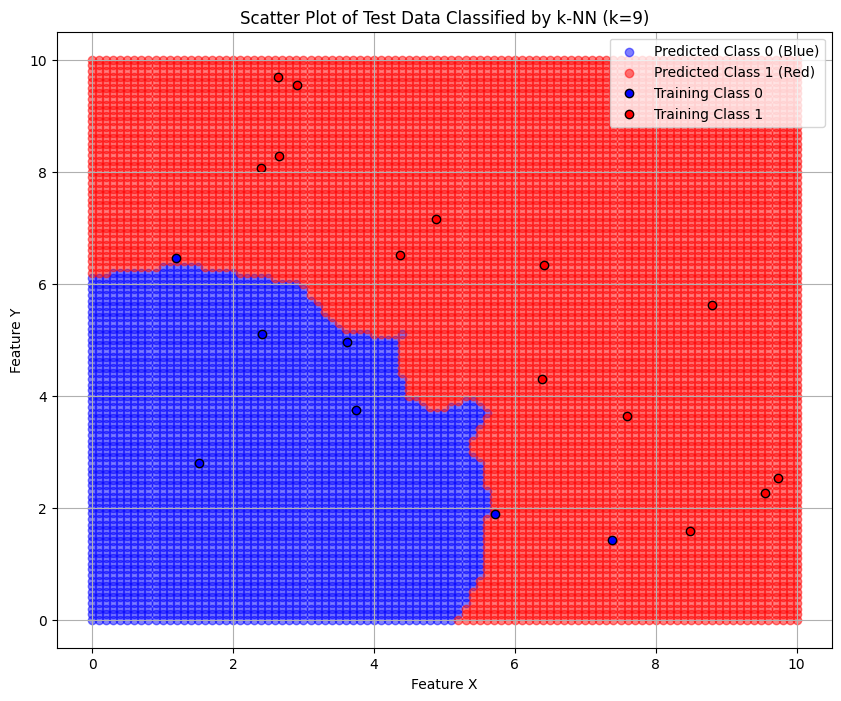

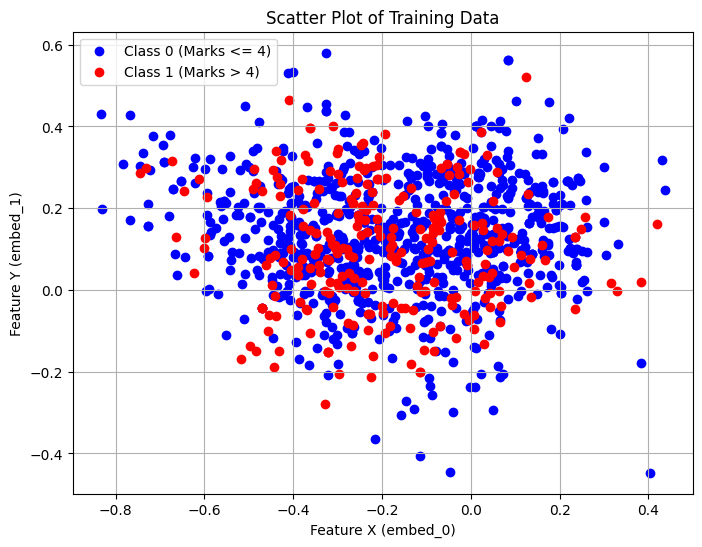

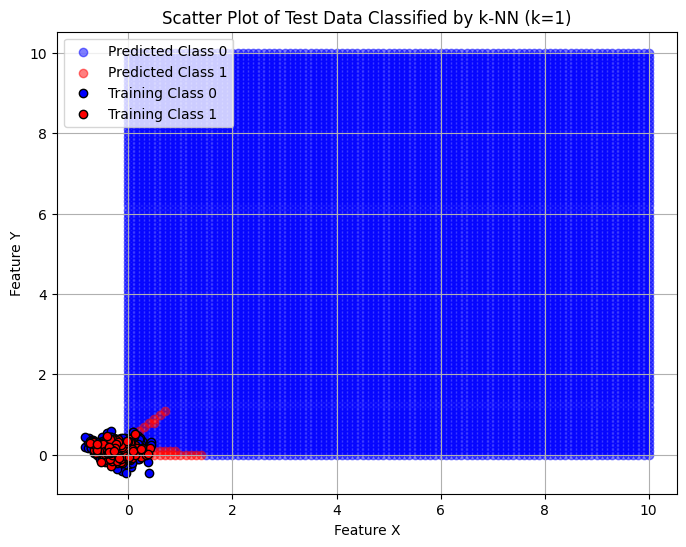

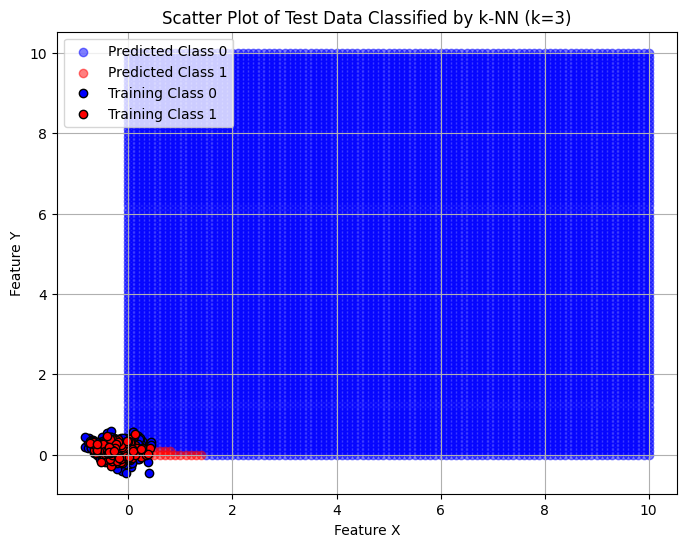

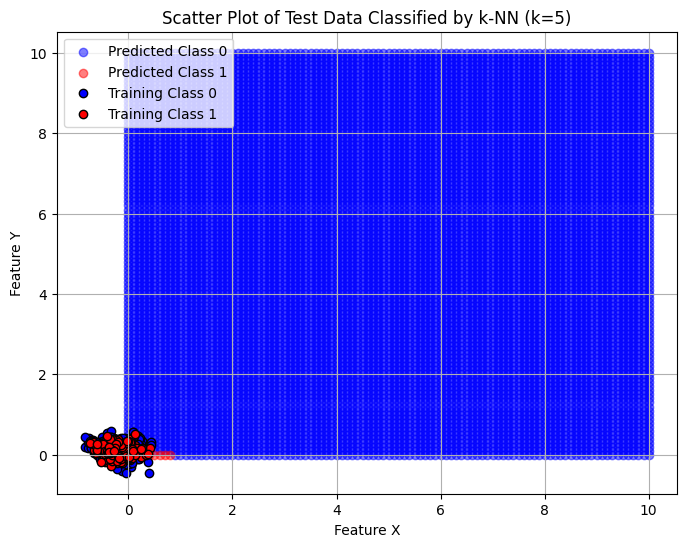

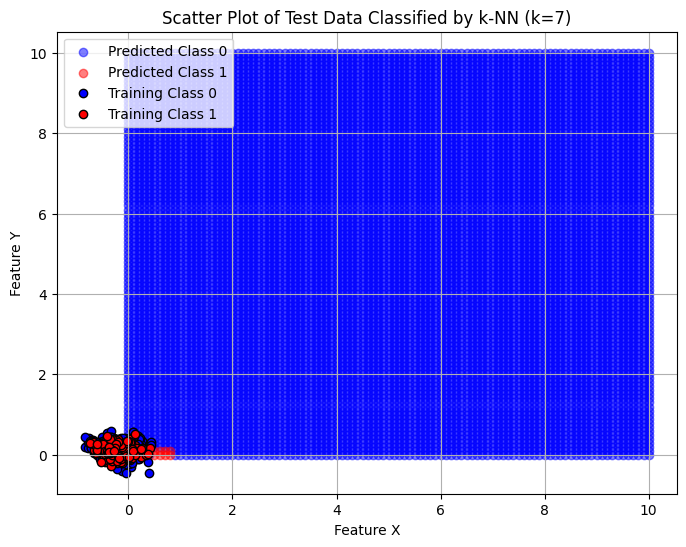

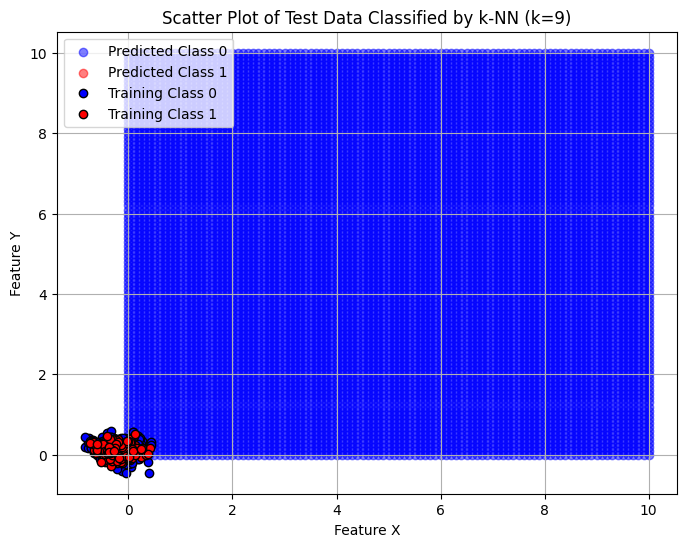

Best k value found: 1


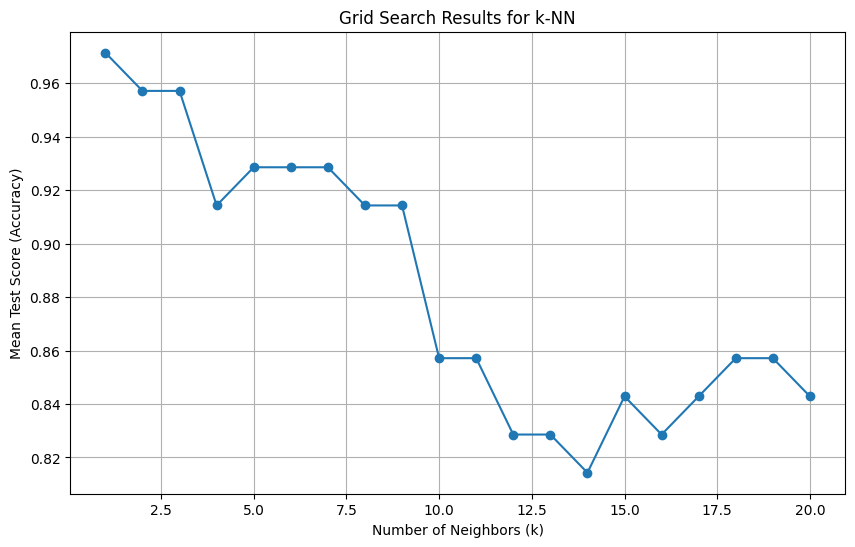

Final Model Performance on Test Set:
Accuracy: 1.0000
Confusion Matrix:
[[13  0]
 [ 0 17]]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

def question1_knn_classification(filepath):
    df = pd.read_excel(filepath)  # Adjust the sheet name as needed
    feature_columns = [f'embed_{i}' for i in range(384)]
    target_column = 'output'

    # Convert continuous output to categorical (e.g., by binning)
    df['output_binned'] = pd.cut(df[target_column], bins=3, labels=[0, 1, 2])
    X = df[feature_columns]
    y = df['output_binned']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the KNN classifier
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        'train_confusion_matrix': confusion_matrix(y_train, y_train_pred),
        'test_confusion_matrix': confusion_matrix(y_test, y_test_pred),
        'train_precision': precision_score(y_train, y_train_pred, average='weighted'),
        'train_recall': recall_score(y_train, y_train_pred, average='weighted'),
        'train_f1': f1_score(y_train, y_train_pred, average='weighted'),
        'test_precision': precision_score(y_test, y_test_pred, average='weighted'),
        'test_recall': recall_score(y_test, y_test_pred, average='weighted'),
        'test_f1': f1_score(y_test, y_test_pred, average='weighted')
    }

    return metrics

def a2(filepath):
   df = pd.read_excel(filepath, sheet_name=0)  # Read the first sheet of the Excel file

    # Features and target variable
    X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
    y = df['Payment (Rs)']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'train_mse': mean_squared_error(y_train, y_train_pred),
        'test_mse': mean_squared_error(y_test, y_test_pred),
        'train_mape': mean_absolute_percentage_error(y_train, y_train_pred),
        'test_mape': mean_absolute_percentage_error(y_test, y_test_pred),
        'train_r2': r2_score(y_train, y_train_pred),
        'test_r2': r2_score(y_test, y_test_pred)
    }

    return metrics

def a3():
    """Generates random data points, assigns classes based on a simple rule, and visualizes them."""
    # Generate 20 random data points for features X and Y between 1 and 10
    np.random.seed(42)  # For reproducibility
    X = np.random.uniform(1, 10, 20)
    Y = np.random.uniform(1, 10, 20)

    # Assign classes based on some criteria (e.g., sum of X and Y)
    classes = []
    for x, y in zip(X, Y):
        if x + y > 10:
            classes.append(1)  # Class 1 (Red)
        else:
            classes.append(0)  # Class 0 (Blue)
    classes = np.array(classes)

    # Plot the points and color them based on their class
    plt.figure(figsize=(8, 6))

    # Plot Class 0 (Blue)
    plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0 (Blue)')

    # Plot Class 1 (Red)
    plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1 (Red)')

    # Add labels and legend
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('Scatter Plot of Training Data')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

def a4(k=3):
    """Generates a test set, classifies it with k-NN, and visualizes the results."""
    # Generate test set data (X_test and Y_test) with values between 0 and 10 with increments of 0.1
    x_test = np.arange(0, 10.1, 0.1)
    y_test = np.arange(0, 10.1, 0.1)
    X_test, Y_test = np.meshgrid(x_test, y_test)
    X_test_flat = X_test.flatten()
    Y_test_flat = Y_test.flatten()
    # Combine X and Y into a single test set array
    test_data = np.c_[X_test_flat, Y_test_flat]

    # Use the same training data generated in a3()
    np.random.seed(42)  # Ensure consistency with a3
    X_train = np.random.uniform(1, 10, 20)
    Y_train = np.random.uniform(1, 10, 20)
    classes = np.array([1 if x + y > 10 else 0 for x, y in zip(X_train, Y_train)])
    train_data = np.c_[X_train, Y_train]

    # k-NN classifier with variable k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, classes)

    # Predict the classes for the test data
    predicted_classes = knn.predict(test_data)

    # Plot the test data with predicted class colors
    plt.figure(figsize=(10, 8))

    # Plot predicted Class 0 (Blue)
    plt.scatter(X_test_flat[predicted_classes == 0], Y_test_flat[predicted_classes == 0], color='blue', label='Predicted Class 0 (Blue)', alpha=0.5)

    # Plot predicted Class 1 (Red)
    plt.scatter(X_test_flat[predicted_classes == 1], Y_test_flat[predicted_classes == 1], color='red', label='Predicted Class 1 (Red)', alpha=0.5)

    # Plot original training data for reference
    plt.scatter(X_train[classes == 0], Y_train[classes == 0], color='blue', edgecolor='black', label='Training Class 0', marker='o')
    plt.scatter(X_train[classes == 1], Y_train[classes == 1], color='red', edgecolor='black', label='Training Class 1', marker='o')

    # Add labels, legend, and title
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'Scatter Plot of Test Data Classified by k-NN (k={k})')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

def a5():
    """Test the a4 function with different values of k."""
    k_values = [1, 3, 5, 7, 9]
    for k in k_values:
        a4(k)

def a6():
    """Classifies data with k-NN and visualizes the results."""
    file_path = "training_mathbert 4.xlsx"
    data = pd.read_excel(file_path)

    # Features
    X_train = data[['embed_0', 'embed_1']].values

    # Target variable: marks above 4 are class 1, otherwise class 0
    y_train = (data['output'].values > 4).astype(int)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0 (Marks <= 4)')
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1 (Marks > 4)')
    plt.xlabel('Feature X (embed_0)')
    plt.ylabel('Feature Y (embed_1)')
    plt.title('Scatter Plot of Training Data')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create a mesh grid for test data
    x_test = np.arange(0, 10.1, 0.1)
    y_test = np.arange(0, 10.1, 0.1)
    X_test, Y_test = np.meshgrid(x_test, y_test)
    X_test_flat = X_test.flatten()
    Y_test_flat = Y_test.flatten()
    test_data = np.c_[X_test_flat, Y_test_flat]

    for k in [1, 3, 5, 7, 9]:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        predicted_classes = knn.predict(test_data)

        plt.figure(figsize=(8, 6))
        plt.scatter(X_test_flat[predicted_classes == 0], Y_test_flat[predicted_classes == 0], color='blue', label='Predicted Class 0', alpha=0.5)
        plt.scatter(X_test_flat[predicted_classes == 1], Y_test_flat[predicted_classes == 1], color='red', label='Predicted Class 1', alpha=0.5)
        plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', edgecolor='black', label='Training Class 0', marker='o')
        plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', edgecolor='black', label='Training Class 1', marker='o')
        plt.xlabel('Feature X')
        plt.ylabel('Feature Y')
        plt.title(f'Scatter Plot of Test Data Classified by k-NN (k={k})')
        plt.legend()
        plt.grid(True)
        plt.show()

def a7():
    """Find the best k value for k-NN classifier using GridSearchCV and visualize the results."""
    # Generate some random data
    np.random.seed(42)
    X = np.random.uniform(1, 10, (100, 2))
    y = np.array([1 if x[0] + x[1] > 10 else 0 for x in X])

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define the parameter grid
    param_grid = {'n_neighbors': np.arange(1, 21)}

    # Initialize and fit the GridSearchCV
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best k
    best_k = grid_search.best_params_['n_neighbors']
    print(f"Best k value found: {best_k}")

    # Visualize the results
    plt.figure(figsize=(10, 6))
    plt.plot(param_grid['n_neighbors'], grid_search.cv_results_['mean_test_score'], marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Mean Test Score (Accuracy)')
    plt.title('Grid Search Results for k-NN')
    plt.grid(True)
    plt.show()

    # Train the final model with the best k
    final_knn = KNeighborsClassifier(n_neighbors=best_k)
    final_knn.fit(X_train, y_train)

    # Test the final model
    y_test_pred = final_knn.predict(X_test)
    print("Final Model Performance on Test Set:")
    print(f"Accuracy: {np.mean(y_test_pred == y_test):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")

def main():
    metrics = question1_knn_classification('training_mathbert 4.xlsx')
    print("KNN Classification Metrics:", metrics)
    linear_regression_metrics = a2('lb.xlsx')
    print("Linear Regression Metrics:", linear_regression_metrics)
    a3()
    a4()
    a5()
    a6()
    a7()

if __name__ == "__main__":
    main()
